## Exploratory data analysis: Getting insights from data

### 1. Import library

In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Visualize.make_dataframe import make_dataframe
from Visualize.retrieve_topic import retrieve_topic
from Visualize.visualize_frequency_words import visualize_frequency_words

### 2. Get data from Mongodb and convert to dataframe

In [2]:
df = pd.DataFrame()
df = make_dataframe()
df.head(3)

,title,content,url,label,imageURL,domain,topic,date
0,Bức vẽ giúp bạn đánh giá mức độ stress của bản...,"[tranh, vòng_tròn, chuyển_động, chậm_rãi, hình...",https://suckhoe.vnexpress.net/tin-tuc/tu-van/b...,1,https://i-suckhoe.vnecdn.net/2018/11/16/onh-15...,suckhoe.vnexpress.net,None,2018-11-17 12:15:00
1,KHẨN CẤP: Hàng loạt trẻ em nhập viện vì ngộ độ...,"[xét_nghiệm, ban_đầu, trẻ, nhập_viện, bé, dấu_...",http://phapluat.news/khan-cap-hang-loat-tre-em...,1,http://img-static.phapluat.news/2017/10/H1.jpg,phapluat.news,None,2017-10-04 14:29:00
2,"Không đủ tiền tiêu hủy, Chi cục Thú y đề nghị ...","[28, 9, ubnd, thành_phố, chi_cục, thú_i, văn_b...",http://phapluat.news/khong-du-tien-tieu-huy-ch...,1,http://img-static.phapluat.news/2017/09/h1-4.jpg,phapluat.news,None,2017-09-28 11:48:06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6022 non-null   object
 1   content   6022 non-null   object
 2   url       6022 non-null   object
 3   label     6022 non-null   int64 
 4   imageURL  6022 non-null   object
 5   domain    6022 non-null   object
 6   topic     5780 non-null   object
 7   date      6009 non-null   object
dtypes: int64(1), object(7)
memory usage: 376.5+ KB


### 4. Get insights

4.1 Get brief infomation

In [4]:
print("Shape:",df.shape)
print("Columns:", df.columns.tolist())

Shape: (6022, 8)
Columns: ['title', 'content', 'url', 'label', 'imageURL', 'domain', 'topic', 'date']


4.2 Check whether the distribution of classes is different

<AxesSubplot: ylabel='label'>

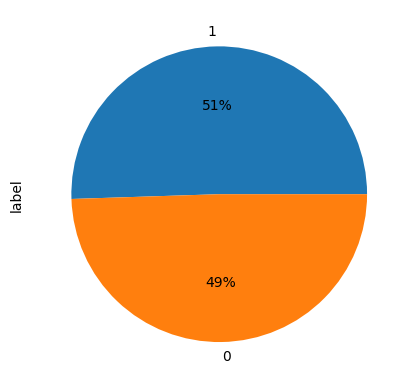

In [5]:
df['label'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

4.3 Statistical information of content

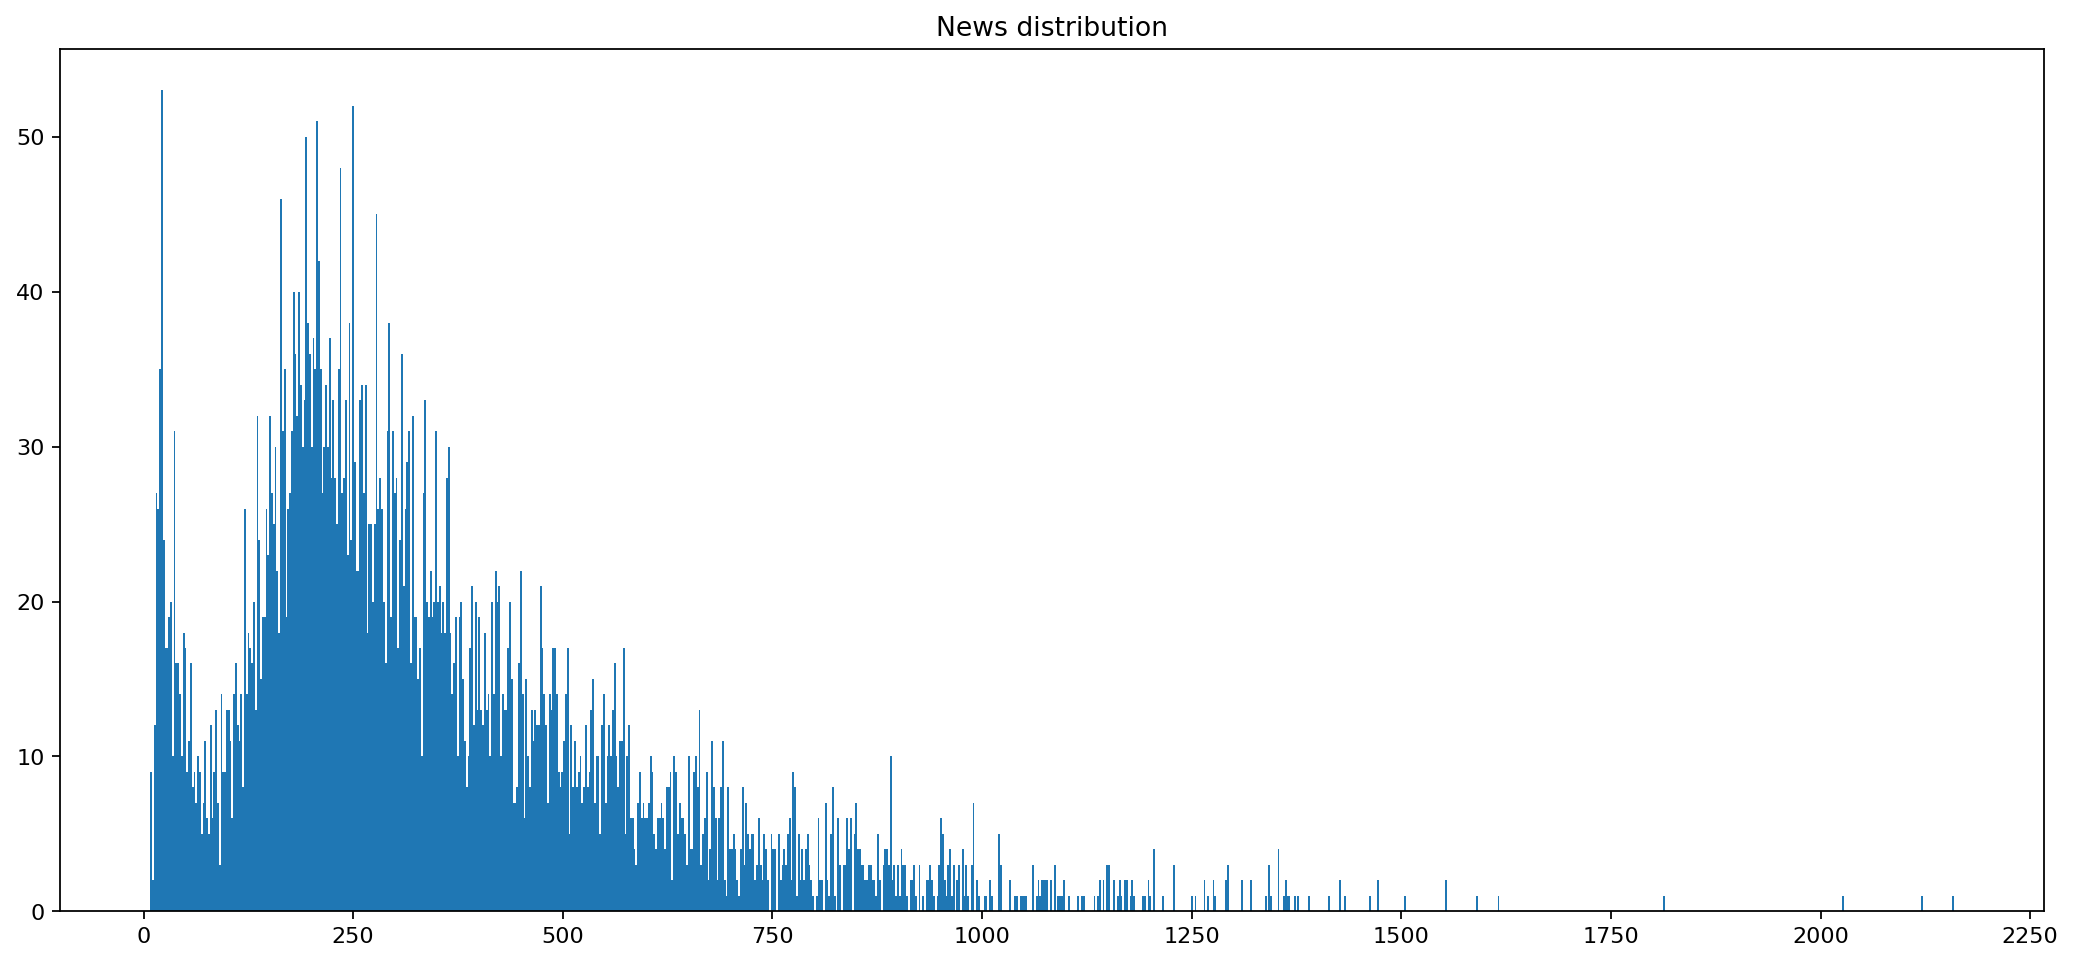

In [6]:
doc_lens = [len(d) for d in df.content]
plt.figure(figsize=(16,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.hist(doc_lens, bins = 1000)
plt.title("News distribution")

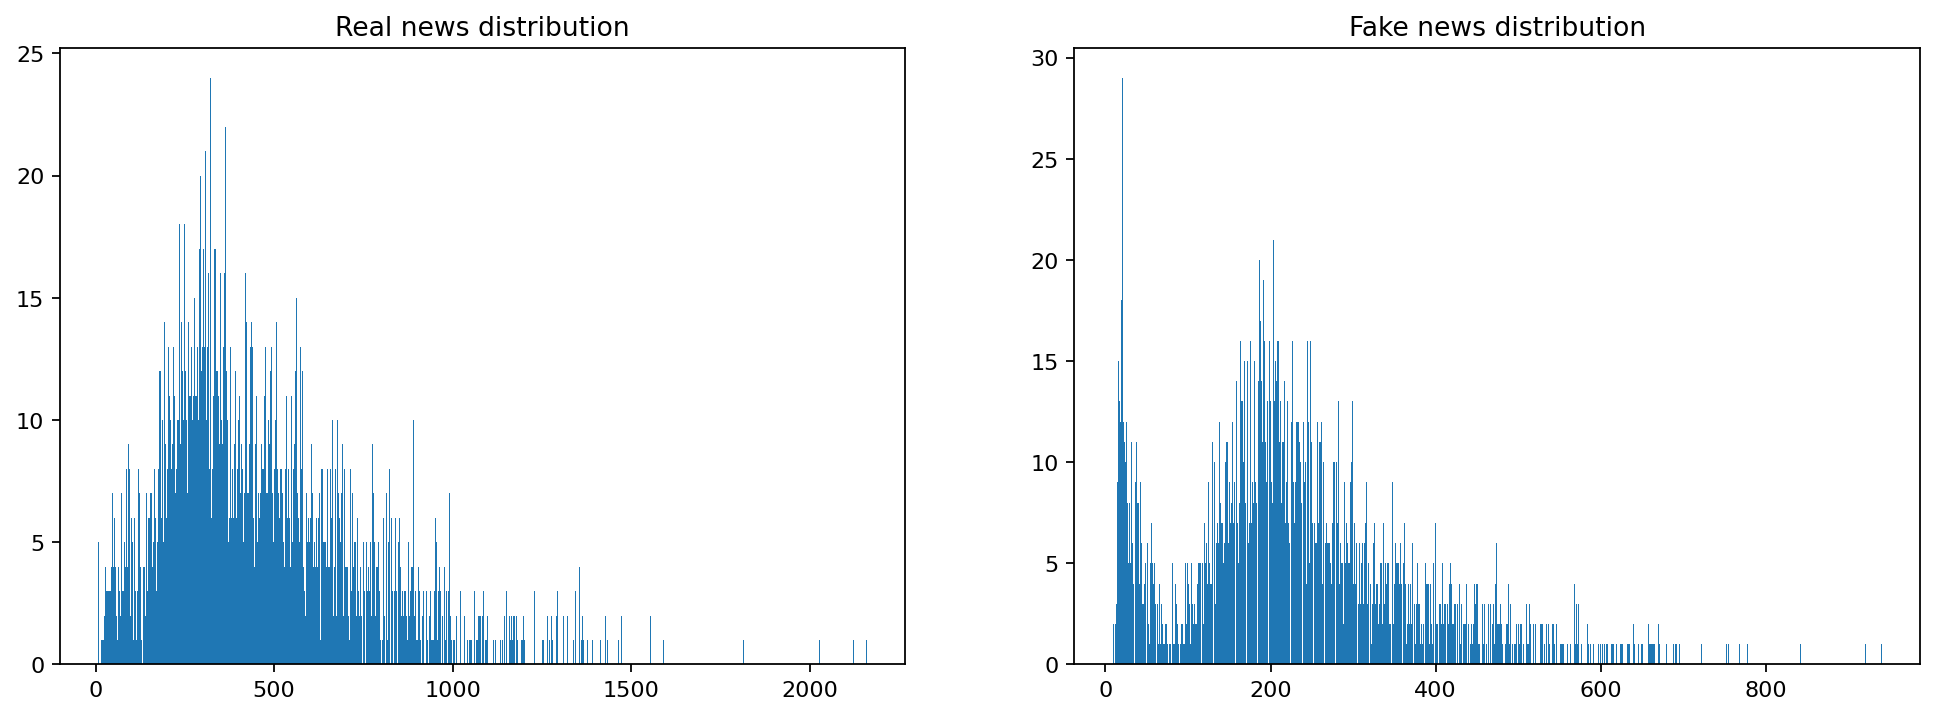

In [7]:
fake_df = df[df['label'] == 1]
real_df = df[df['label'] == 0]
fake_doc_lens = [len(d) for d in fake_df.content]
real_doc_lens = [len(d) for d in real_df.content]

fig, axes = plt.subplots(1,2,figsize=(15,5), dpi=160)
axes[0].hist(fake_doc_lens, bins = 1000)
axes[0].set_title("Real news distribution")

axes[1].hist(real_doc_lens, bins = 1000)
axes[1].set_title("Fake news distribution")

#### 4.x Topic extraction

In [8]:
df['topic_extract'] = pd.Series()
for i in range(df.shape[0]):
    df['topic_extract'][i] = retrieve_topic(df['content'][i])

In [9]:
pd.set_option('display.max_colwidth', None)
df['topic_extract']

0       [hình_ảnh, chuyển_động, ảnh, alic, hiệu_ứng, nhận_thức, tiến_sĩ, thần_kinh, proverbio, v4]
1                        [thuốc, tiêm, heo, an_thần, bé, trẻ, trường, nhập_viện, ban_đầu, cấp_cứu]
2                         [chó, chi_cục, thảo, cầm_viên, hoang, thú, đem, tiêu_hủi, sư_tử, vô_chủ]
3                                   [chó, bắt, chi_cục, thú_i, đội, hcm, tp, săn_bắt, xe_tải, hai]
4               [xăng, dầu, doanh_nghiệp, hiệp_hội, việt_nam, trạm, iq8, nước_ngoài, nhật, hà_nội]
                                                   ...                                            
6017                             [đá, pháp, cầu, nam, đi, hình_ảnh, việt, việt_nam, trang, nguyễn]
6018                   [thuyền_buồm, đua, clipper, race, việt, vịnh, hạ_long, đoàn, thủy_thủ, nam]
6019           [đi, 10000, nghiên_cứu, con_số, mục_tiêu, hình_ảnh, sức_khỏe, phụ_nữ, đếm, lợi_ích]
6020               [đội, bóng, chelsea, hình_ảnh, trận, lampard, huấn_luyện_viên, hai, giải, unit]
6021      

Topic

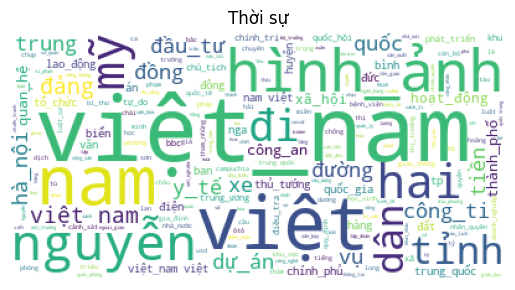

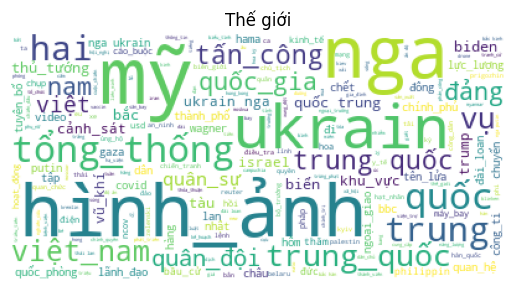

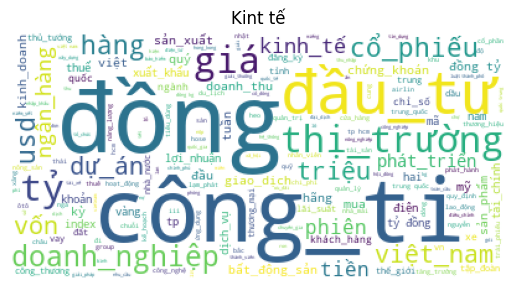

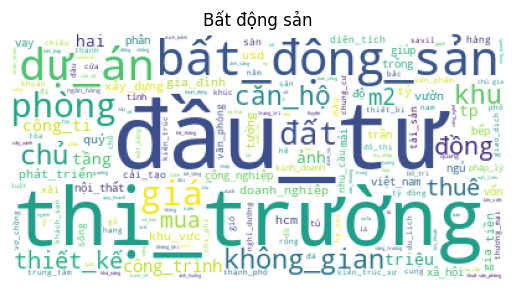

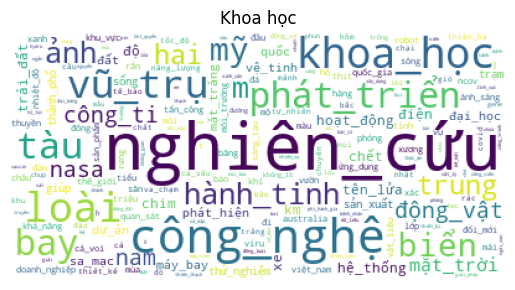

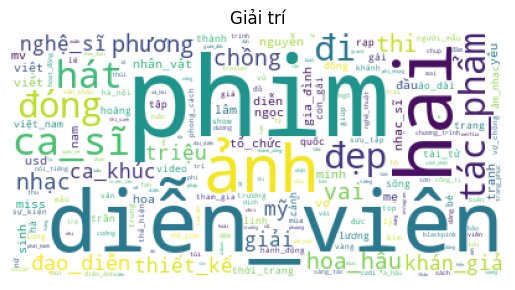

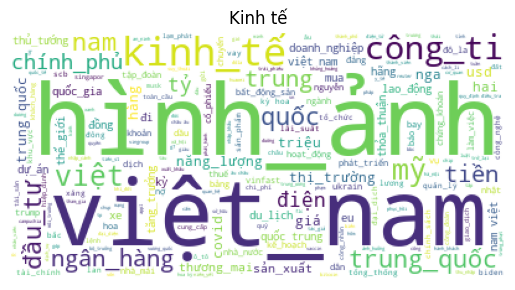

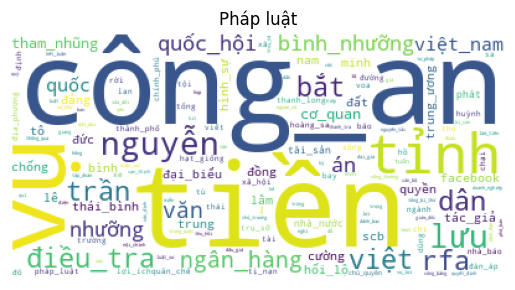

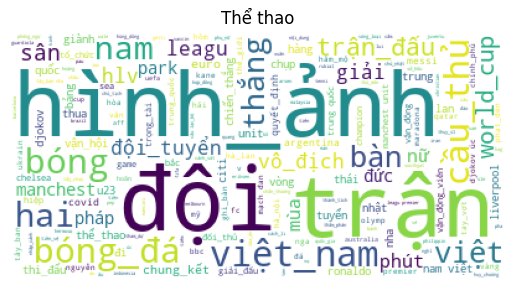

In [11]:
general_topic = list(df.topic.unique())
general_topic.remove(None)

grouped_df = df.groupby(['topic'])
for t in general_topic:
    tmp = grouped_df.get_group(t)
    visualize_frequency_words(tmp, 'topic_extract', t)